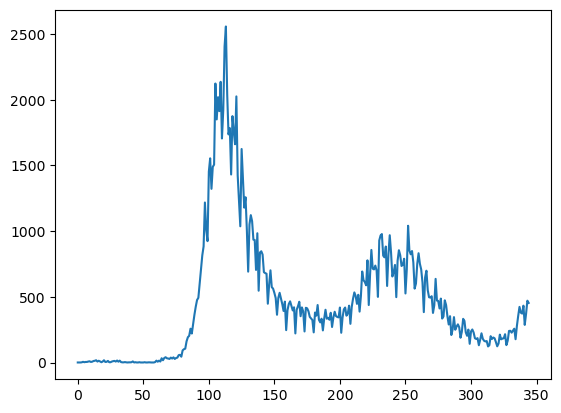

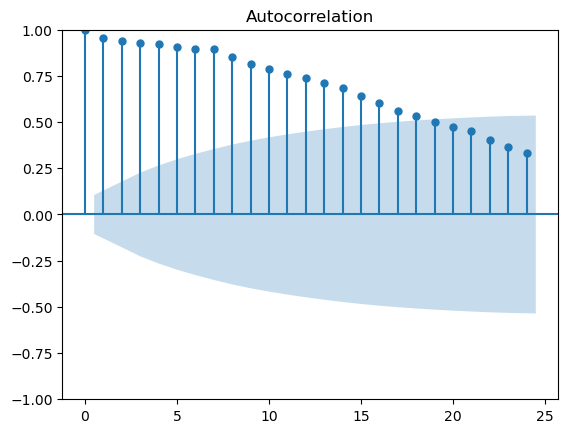

D:\88690\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


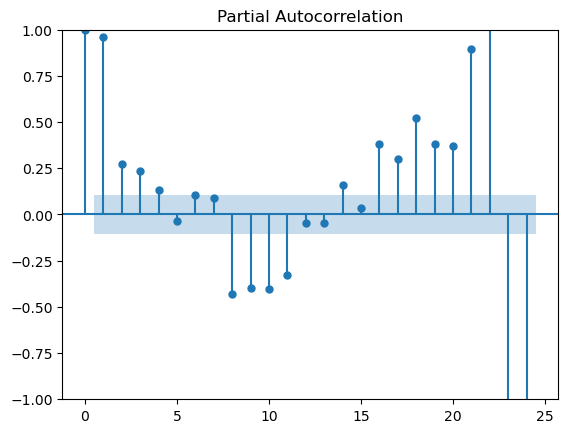

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from tensorflow import keras
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import SimpleRNN
from tensorflow.keras.layers import LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# LSTM with regression framing
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from keras import optimizers
dataset = pandas.read_csv(r'各縣市每日確診資料\基隆市每日確診數.csv', usecols=[2], engine='python', skipfooter=3,encoding='utf-8')
plt.plot(dataset)
plt.savefig('Keelung.png')
plt.show()

# 畫出 ACF 12 期的效應
sm.graphics.tsa.plot_acf(dataset, lags=24)
plt.savefig('Keelung_acf_24.png')
plt.show()
# 畫出 PACF 12 期的效應
sm.graphics.tsa.plot_pacf(dataset, lags=24)
plt.savefig('Keelung_pacf_24.png')
plt.show()

In [2]:
# 產生 (X, Y) 資料集, Y 是下一期的感染人數
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# 載入訓練資料
dataframe = read_csv(r'各縣市每日確診資料\基隆市每日確診數.csv', usecols=[2], engine='python', skipfooter=0,encoding='utf-8')
dataframe=dataframe.drop(dataframe[dataframe['確定病例數']==0].index,axis=0)
print(dataframe)
#plt.plot(dataframe)

dataset = dataframe.values
print(len(dataset))
#dataset=np.delete(dataset,[0,768],axis=0)

# 正規化(normalize) 資料，使資料值介於[0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

     確定病例數
0        1
1        1
2        1
3        2
4        6
..     ...
341    287
342    370
343    471
344    454
345    387

[346 rows x 1 columns]
346


## RNN結合LSTM架構

### Model1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1, 64)             4224      
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 37,313
Trainable params: 37,313
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
31/31 [==============================] - 4s 33ms/step - loss: 0.0642 - mse: 0.0642 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 2/1000
31/31 [==============================] - 0s 4ms/step - loss: 0.0426 - mse: 0.0426 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 3/1000
31/31 [==============================]

31/31 [==============================] - 0s 6ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 57/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 58/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 59/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 60/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 61/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 62/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 63/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0130 -

Epoch 117/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 8.7969e-04 - val_mse: 8.7969e-04
Epoch 118/1000
31/31 [==============================] - 0s 13ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 8.3993e-04 - val_mse: 8.3993e-04
Epoch 119/1000
31/31 [==============================] - 0s 10ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 7.7189e-04 - val_mse: 7.7189e-04
Epoch 120/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 7.8095e-04 - val_mse: 7.8095e-04
Epoch 121/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 7.8687e-04 - val_mse: 7.8687e-04
Epoch 122/1000
31/31 [==============================] - 0s 14ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 7.5919e-04 - val_mse: 7.5919e-04
Epoch 123/1000
31/31 [==============================] - 0s 9ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 7.4483e-04 - val_mse: 7.4483e-04
Epo

31/31 [==============================] - 0s 6ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 4.9240e-04 - val_mse: 4.9240e-04
Epoch 175/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 4.9716e-04 - val_mse: 4.9716e-04
Epoch 176/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 4.9471e-04 - val_mse: 4.9471e-04
Epoch 177/1000
31/31 [==============================] - 0s 11ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 4.8180e-04 - val_mse: 4.8180e-04
Epoch 178/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 4.9418e-04 - val_mse: 4.9418e-04
Epoch 179/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 4.8995e-04 - val_mse: 4.8995e-04
Epoch 180/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 4.8988e-04 - val_mse: 4.8988e-04
Epoch 181/1000
31/31

Epoch 232/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 4.8651e-04 - val_mse: 4.8651e-04
Epoch 233/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 4.8409e-04 - val_mse: 4.8409e-04
Epoch 234/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 4.8472e-04 - val_mse: 4.8472e-04
Epoch 235/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 4.8771e-04 - val_mse: 4.8771e-04
Epoch 236/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 4.8478e-04 - val_mse: 4.8478e-04
Epoch 237/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 4.8579e-04 - val_mse: 4.8579e-04
Epoch 238/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 4.8571e-04 - val_mse: 4.8571e-04
Epoch 

Epoch 290/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9511e-04 - val_mse: 4.9511e-04
Epoch 291/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9511e-04 - val_mse: 4.9511e-04
Epoch 292/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9850e-04 - val_mse: 4.9850e-04
Epoch 293/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9531e-04 - val_mse: 4.9531e-04
Epoch 294/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9666e-04 - val_mse: 4.9666e-04
Epoch 295/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9611e-04 - val_mse: 4.9611e-04
Epoch 296/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9600e-04 - val_mse: 4.9600e-04
Epoch 

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9969e-04 - val_mse: 4.9969e-04
Epoch 348/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0004e-04 - val_mse: 5.0004e-04
Epoch 349/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9877e-04 - val_mse: 4.9877e-04
Epoch 350/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9869e-04 - val_mse: 4.9869e-04
Epoch 351/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9961e-04 - val_mse: 4.9961e-04
Epoch 352/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0153e-04 - val_mse: 5.0153e-04
Epoch 353/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9960e-04 - val_mse: 4.9960e-04
Epoch 354/1000
31/31 

Epoch 405/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0035e-04 - val_mse: 5.0035e-04
Epoch 406/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0386e-04 - val_mse: 5.0386e-04
Epoch 407/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0177e-04 - val_mse: 5.0177e-04
Epoch 408/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0009e-04 - val_mse: 5.0009e-04
Epoch 409/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0030e-04 - val_mse: 5.0030e-04
Epoch 410/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0179e-04 - val_mse: 5.0179e-04
Epoch 411/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0100e-04 - val_mse: 5.0100e-04
Epoch 

Epoch 463/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0368e-04 - val_mse: 5.0368e-04
Epoch 464/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0385e-04 - val_mse: 5.0385e-04
Epoch 465/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9984e-04 - val_mse: 4.9984e-04
Epoch 466/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0013e-04 - val_mse: 5.0013e-04
Epoch 467/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0157e-04 - val_mse: 5.0157e-04
Epoch 468/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0255e-04 - val_mse: 5.0255e-04
Epoch 469/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0012e-04 - val_mse: 5.0012e-04
Epoch 

31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0182e-04 - val_mse: 5.0182e-04
Epoch 521/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0168e-04 - val_mse: 5.0168e-04
Epoch 522/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0001e-04 - val_mse: 5.0001e-04
Epoch 523/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9979e-04 - val_mse: 4.9979e-04
Epoch 524/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0259e-04 - val_mse: 5.0259e-04
Epoch 525/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0046e-04 - val_mse: 5.0046e-04
Epoch 526/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0409e-04 - val_mse: 5.0409e-04
Epoch 527/1000
31/31 

Epoch 578/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0104e-04 - val_mse: 5.0104e-04
Epoch 579/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9996e-04 - val_mse: 4.9996e-04
Epoch 580/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0165e-04 - val_mse: 5.0165e-04
Epoch 581/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0037e-04 - val_mse: 5.0037e-04
Epoch 582/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0228e-04 - val_mse: 5.0228e-04
Epoch 583/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0126e-04 - val_mse: 5.0126e-04
Epoch 584/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0045e-04 - val_mse: 5.0045e-04
Epoch 

Epoch 636/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0075e-04 - val_mse: 5.0075e-04
Epoch 637/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9986e-04 - val_mse: 4.9986e-04
Epoch 638/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0197e-04 - val_mse: 5.0197e-04
Epoch 639/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0037e-04 - val_mse: 5.0037e-04
Epoch 640/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9968e-04 - val_mse: 4.9968e-04
Epoch 641/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0233e-04 - val_mse: 5.0233e-04
Epoch 642/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0124e-04 - val_mse: 5.0124e-04
Epoch 

Epoch 694/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9953e-04 - val_mse: 4.9953e-04
Epoch 695/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0049e-04 - val_mse: 5.0049e-04
Epoch 696/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0001e-04 - val_mse: 5.0001e-04
Epoch 697/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9936e-04 - val_mse: 4.9936e-04
Epoch 698/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9905e-04 - val_mse: 4.9905e-04
Epoch 699/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0187e-04 - val_mse: 5.0187e-04
Epoch 700/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9899e-04 - val_mse: 4.9899e-04
Epoch 

Epoch 752/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0047e-04 - val_mse: 5.0047e-04
Epoch 753/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0241e-04 - val_mse: 5.0241e-04
Epoch 754/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9927e-04 - val_mse: 4.9927e-04
Epoch 755/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0050e-04 - val_mse: 5.0050e-04
Epoch 756/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9855e-04 - val_mse: 4.9855e-04
Epoch 757/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0321e-04 - val_mse: 5.0321e-04
Epoch 758/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9964e-04 - val_mse: 4.9964e-04
Epoch 

31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9967e-04 - val_mse: 4.9967e-04
Epoch 810/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9869e-04 - val_mse: 4.9869e-04
Epoch 811/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9762e-04 - val_mse: 4.9762e-04
Epoch 812/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9835e-04 - val_mse: 4.9835e-04
Epoch 813/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9764e-04 - val_mse: 4.9764e-04
Epoch 814/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0206e-04 - val_mse: 5.0206e-04
Epoch 815/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0418e-04 - val_mse: 5.0418e-04
Epoch 816/1000
31/31 

Epoch 867/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9756e-04 - val_mse: 4.9756e-04
Epoch 868/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9876e-04 - val_mse: 4.9876e-04
Epoch 869/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9746e-04 - val_mse: 4.9746e-04
Epoch 870/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0073e-04 - val_mse: 5.0073e-04
Epoch 871/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9931e-04 - val_mse: 4.9931e-04
Epoch 872/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9784e-04 - val_mse: 4.9784e-04
Epoch 873/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9980e-04 - val_mse: 4.9980e-04
Epoch 

Epoch 925/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9911e-04 - val_mse: 4.9911e-04
Epoch 926/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9828e-04 - val_mse: 4.9828e-04
Epoch 927/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9763e-04 - val_mse: 4.9763e-04
Epoch 928/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9802e-04 - val_mse: 4.9802e-04
Epoch 929/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9946e-04 - val_mse: 4.9946e-04
Epoch 930/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9857e-04 - val_mse: 4.9857e-04
Epoch 931/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9814e-04 - val_mse: 4.9814e-04
Epoch 

Epoch 983/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9840e-04 - val_mse: 4.9840e-04
Epoch 984/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9730e-04 - val_mse: 4.9730e-04
Epoch 985/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9692e-04 - val_mse: 4.9692e-04
Epoch 986/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9986e-04 - val_mse: 4.9986e-04
Epoch 987/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9744e-04 - val_mse: 4.9744e-04
Epoch 988/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9874e-04 - val_mse: 4.9874e-04
Epoch 989/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9760e-04 - val_mse: 4.9760e-04
Epoch 

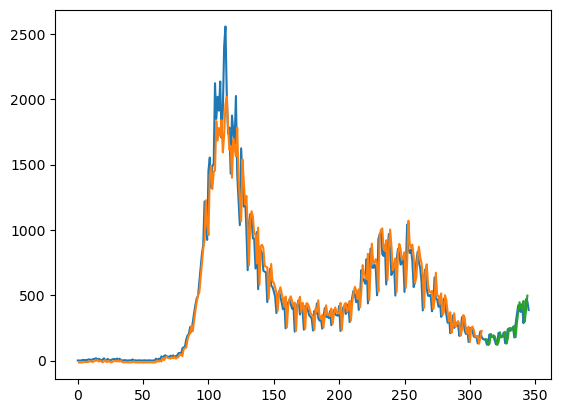

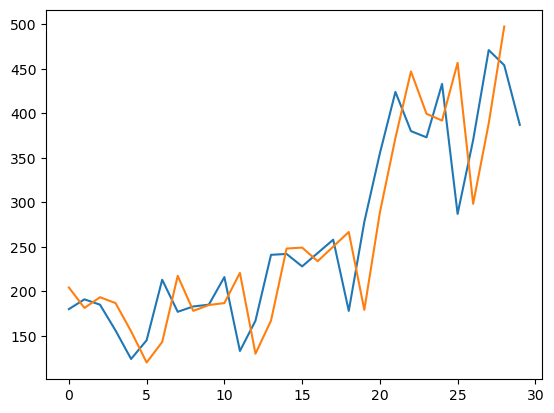

In [3]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    LSTM(64, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="keelung_rnn+lstm_1000_1.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=1000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('keelung_rnn+lstm_1000_1.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
#看裡面的值是否合理、資料結構的dim
print(trainPredict,trainY)
print(testPredict,testY)

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('keelung_rnn+lstm_1000_plot_1.png') 
plt.show()
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("keelung_rnn+lstm_1000_predict&real_1.png")
plt.show()

### Model2

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 1, 128)            16640     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 148,353
Trainable params: 148,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
31/31 [==============================] - 4s 33ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 2/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0400 - mse: 0.0400 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 3/1000
31/31 [===========================

31/31 [==============================] - 0s 6ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 57/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 58/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 59/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 60/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 61/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 62/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 63/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0131 -

31/31 [==============================] - 0s 6ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 9.1727e-04 - val_mse: 9.1727e-04
Epoch 118/1000
31/31 [==============================] - 0s 10ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 8.7614e-04 - val_mse: 8.7614e-04
Epoch 119/1000
31/31 [==============================] - 0s 11ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 8.0425e-04 - val_mse: 8.0425e-04
Epoch 120/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 8.1324e-04 - val_mse: 8.1324e-04
Epoch 121/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 8.1991e-04 - val_mse: 8.1991e-04
Epoch 122/1000
31/31 [==============================] - 0s 10ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 7.9058e-04 - val_mse: 7.9058e-04
Epoch 123/1000
31/31 [==============================] - 0s 10ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 7.7494e-04 - val_mse: 7.7494e-04
Epoch 124/1000
31

31/31 [==============================] - 0s 7ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 4.9879e-04 - val_mse: 4.9879e-04
Epoch 175/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 5.0407e-04 - val_mse: 5.0407e-04
Epoch 176/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 5.0089e-04 - val_mse: 5.0089e-04
Epoch 177/1000
31/31 [==============================] - 0s 12ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 4.8657e-04 - val_mse: 4.8657e-04
Epoch 178/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 5.0033e-04 - val_mse: 5.0033e-04
Epoch 179/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 4.9561e-04 - val_mse: 4.9561e-04
Epoch 180/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 4.9540e-04 - val_mse: 4.9540e-04
Epoch 181/1000
31/31

Epoch 232/1000
31/31 [==============================] - 0s 9ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 4.8752e-04 - val_mse: 4.8752e-04
Epoch 233/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 4.8402e-04 - val_mse: 4.8402e-04
Epoch 234/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 4.8494e-04 - val_mse: 4.8494e-04
Epoch 235/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 4.8871e-04 - val_mse: 4.8871e-04
Epoch 236/1000
31/31 [==============================] - 0s 9ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 4.8445e-04 - val_mse: 4.8445e-04
Epoch 237/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 4.8613e-04 - val_mse: 4.8613e-04
Epoch 238/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 4.8586e-04 - val_mse: 4.8586e-04
Epoch 

Epoch 290/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9524e-04 - val_mse: 4.9524e-04
Epoch 291/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9540e-04 - val_mse: 4.9540e-04
Epoch 292/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9768e-04 - val_mse: 4.9768e-04
Epoch 293/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9579e-04 - val_mse: 4.9579e-04
Epoch 294/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9641e-04 - val_mse: 4.9641e-04
Epoch 295/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9610e-04 - val_mse: 4.9610e-04
Epoch 296/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9607e-04 - val_mse: 4.9607e-04
Epoch 

Epoch 348/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0038e-04 - val_mse: 5.0038e-04
Epoch 349/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9955e-04 - val_mse: 4.9955e-04
Epoch 350/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9965e-04 - val_mse: 4.9965e-04
Epoch 351/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0016e-04 - val_mse: 5.0016e-04
Epoch 352/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0158e-04 - val_mse: 5.0158e-04
Epoch 353/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0020e-04 - val_mse: 5.0020e-04
Epoch 354/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0359e-04 - val_mse: 5.0359e-04
Epoch 

Epoch 406/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0406e-04 - val_mse: 5.0406e-04
Epoch 407/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0232e-04 - val_mse: 5.0232e-04
Epoch 408/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0105e-04 - val_mse: 5.0105e-04
Epoch 409/1000
31/31 [==============================] - 0s 9ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0126e-04 - val_mse: 5.0126e-04
Epoch 410/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0236e-04 - val_mse: 5.0236e-04
Epoch 411/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0176e-04 - val_mse: 5.0176e-04
Epoch 412/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0124e-04 - val_mse: 5.0124e-04
Epoch 

Epoch 464/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0439e-04 - val_mse: 5.0439e-04
Epoch 465/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0124e-04 - val_mse: 5.0124e-04
Epoch 466/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0143e-04 - val_mse: 5.0143e-04
Epoch 467/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0249e-04 - val_mse: 5.0249e-04
Epoch 468/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0328e-04 - val_mse: 5.0328e-04
Epoch 469/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0141e-04 - val_mse: 5.0141e-04
Epoch 470/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0546e-04 - val_mse: 5.0546e-04
Epoch 

Epoch 522/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0143e-04 - val_mse: 5.0143e-04
Epoch 523/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0131e-04 - val_mse: 5.0131e-04
Epoch 524/1000
31/31 [==============================] - 0s 9ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0347e-04 - val_mse: 5.0347e-04
Epoch 525/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0177e-04 - val_mse: 5.0177e-04
Epoch 526/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0481e-04 - val_mse: 5.0481e-04
Epoch 527/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0143e-04 - val_mse: 5.0143e-04
Epoch 528/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0453e-04 - val_mse: 5.0453e-04
Epoch 

31/31 [==============================] - 0s 9ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0157e-04 - val_mse: 5.0157e-04
Epoch 580/1000
31/31 [==============================] - 0s 9ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0288e-04 - val_mse: 5.0288e-04
Epoch 581/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0185e-04 - val_mse: 5.0185e-04
Epoch 582/1000
31/31 [==============================] - 0s 10ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0341e-04 - val_mse: 5.0341e-04
Epoch 583/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0254e-04 - val_mse: 5.0254e-04
Epoch 584/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0191e-04 - val_mse: 5.0191e-04
Epoch 585/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0183e-04 - val_mse: 5.0183e-04
Epoch 586/1000
31/31

Epoch 637/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0155e-04 - val_mse: 5.0155e-04
Epoch 638/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0328e-04 - val_mse: 5.0328e-04
Epoch 639/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0198e-04 - val_mse: 5.0198e-04
Epoch 640/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0149e-04 - val_mse: 5.0149e-04
Epoch 641/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0359e-04 - val_mse: 5.0359e-04
Epoch 642/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0265e-04 - val_mse: 5.0265e-04
Epoch 643/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0104e-04 - val_mse: 5.0104e-04
Epoch 

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0146e-04 - val_mse: 5.0146e-04
Epoch 695/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0215e-04 - val_mse: 5.0215e-04
Epoch 696/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0177e-04 - val_mse: 5.0177e-04
Epoch 697/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0128e-04 - val_mse: 5.0128e-04
Epoch 698/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0108e-04 - val_mse: 5.0108e-04
Epoch 699/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0329e-04 - val_mse: 5.0329e-04
Epoch 700/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0107e-04 - val_mse: 5.0107e-04
Epoch 701/1000
31/31 

Epoch 752/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0223e-04 - val_mse: 5.0223e-04
Epoch 753/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0391e-04 - val_mse: 5.0391e-04
Epoch 754/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0129e-04 - val_mse: 5.0129e-04
Epoch 755/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0224e-04 - val_mse: 5.0224e-04
Epoch 756/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0083e-04 - val_mse: 5.0083e-04
Epoch 757/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0453e-04 - val_mse: 5.0453e-04
Epoch 758/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0160e-04 - val_mse: 5.0160e-04
Epoch 

31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0166e-04 - val_mse: 5.0166e-04
Epoch 810/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0093e-04 - val_mse: 5.0093e-04
Epoch 811/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0023e-04 - val_mse: 5.0023e-04
Epoch 812/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0066e-04 - val_mse: 5.0066e-04
Epoch 813/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0027e-04 - val_mse: 5.0027e-04
Epoch 814/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0367e-04 - val_mse: 5.0367e-04
Epoch 815/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0547e-04 - val_mse: 5.0547e-04
Epoch 816/1000
31/31 

Epoch 867/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0021e-04 - val_mse: 5.0021e-04
Epoch 868/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0101e-04 - val_mse: 5.0101e-04
Epoch 869/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0021e-04 - val_mse: 5.0021e-04
Epoch 870/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0268e-04 - val_mse: 5.0268e-04
Epoch 871/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0154e-04 - val_mse: 5.0154e-04
Epoch 872/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0045e-04 - val_mse: 5.0045e-04
Epoch 873/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0192e-04 - val_mse: 5.0192e-04
Epoch 

Epoch 925/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0142e-04 - val_mse: 5.0142e-04
Epoch 926/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0078e-04 - val_mse: 5.0078e-04
Epoch 927/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0030e-04 - val_mse: 5.0030e-04
Epoch 928/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0057e-04 - val_mse: 5.0057e-04
Epoch 929/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0172e-04 - val_mse: 5.0172e-04
Epoch 930/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0101e-04 - val_mse: 5.0101e-04
Epoch 931/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0070e-04 - val_mse: 5.0070e-04
Epoch 

Epoch 983/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0096e-04 - val_mse: 5.0096e-04
Epoch 984/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0015e-04 - val_mse: 5.0015e-04
Epoch 985/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.9988e-04 - val_mse: 4.9988e-04
Epoch 986/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0211e-04 - val_mse: 5.0211e-04
Epoch 987/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0021e-04 - val_mse: 5.0021e-04
Epoch 988/1000
31/31 [==============================] - 0s 6ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0124e-04 - val_mse: 5.0124e-04
Epoch 989/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 5.0040e-04 - val_mse: 5.0040e-04
Epoch 

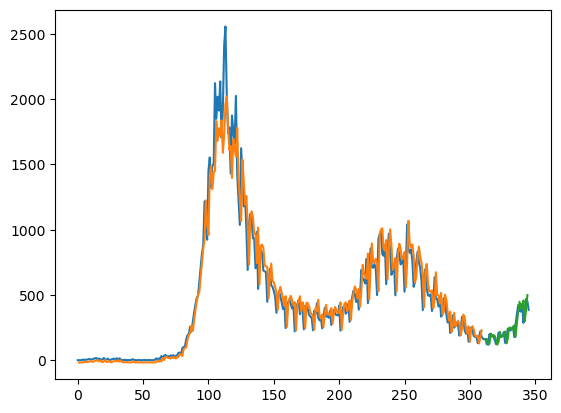

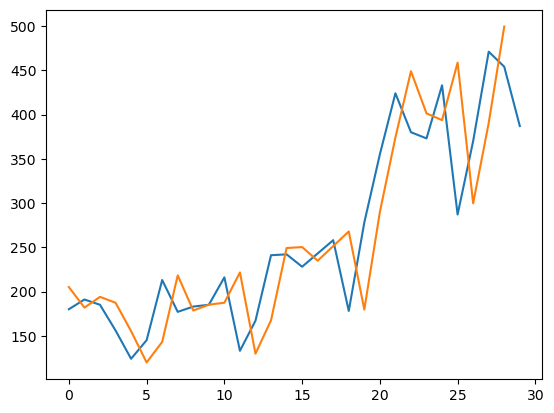

In [4]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(128, return_sequences=True, input_shape=(1, look_back)),
    LSTM(128, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="keelung_rnn+lstm_1000_2.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=1000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('keelung_rnn+lstm_1000_2.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('keelung_rnn+lstm_1000_plot_2.png') 
plt.show()
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("keelung_rnn+lstm_1000_predict&real_2.png")
plt.show()

### Model3

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 1, 64)             4224      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 1, 64)             8256      
                                                                 
 dense_2 (Dense)             (None, 1, 64)             4160      
                                                                 
 lstm_2 (LSTM)               (None, 1, 64)             33024     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 82,753
Trainable params: 82,753
Non-trai

Epoch 52/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 7.6725e-04 - val_mse: 7.6724e-04
Epoch 53/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 7.1111e-04 - val_mse: 7.1111e-04
Epoch 54/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 6.7973e-04 - val_mse: 6.7973e-04
Epoch 55/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 6.7902e-04 - val_mse: 6.7902e-04
Epoch 56/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 6.9161e-04 - val_mse: 6.9161e-04
Epoch 57/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 6.6577e-04 - val_mse: 6.6577e-04
Epoch 58/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 6.9929e-04 - val_mse: 6.9929e-04
Epoch 59/1000

31/31 [==============================] - 0s 12ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 4.8623e-04 - val_mse: 4.8623e-04
Epoch 111/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 5.0495e-04 - val_mse: 5.0495e-04
Epoch 112/1000
31/31 [==============================] - 0s 11ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 4.7219e-04 - val_mse: 4.7219e-04
Epoch 113/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 4.7397e-04 - val_mse: 4.7397e-04
Epoch 114/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 4.8931e-04 - val_mse: 4.8931e-04
Epoch 115/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 4.7593e-04 - val_mse: 4.7593e-04
Epoch 116/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 4.7944e-04 - val_mse: 4.7944e-04
Epoch 117/1000
31/3

Epoch 168/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.6810e-04 - val_mse: 4.6810e-04
Epoch 169/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.6941e-04 - val_mse: 4.6941e-04
Epoch 170/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.6855e-04 - val_mse: 4.6855e-04
Epoch 171/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.6895e-04 - val_mse: 4.6895e-04
Epoch 172/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 4.6887e-04 - val_mse: 4.6887e-04
Epoch 173/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.6889e-04 - val_mse: 4.6889e-04
Epoch 174/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 4.6859e-04 - val_mse: 4.6859e-04
Epoch 

Epoch 226/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 4.6792e-04 - val_mse: 4.6792e-04
Epoch 227/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 4.6716e-04 - val_mse: 4.6716e-04
Epoch 228/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 4.7196e-04 - val_mse: 4.7196e-04
Epoch 229/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 4.6946e-04 - val_mse: 4.6946e-04
Epoch 230/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 4.6965e-04 - val_mse: 4.6965e-04
Epoch 231/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 4.7870e-04 - val_mse: 4.7870e-04
Epoch 232/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 4.7134e-04 - val_mse: 4.7134e-04
Epoch 

Epoch 284/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 4.7411e-04 - val_mse: 4.7411e-04
Epoch 285/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.8165e-04 - val_mse: 4.8165e-04
Epoch 286/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.7849e-04 - val_mse: 4.7849e-04
Epoch 287/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.7805e-04 - val_mse: 4.7805e-04
Epoch 288/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 4.7847e-04 - val_mse: 4.7847e-04
Epoch 289/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.7496e-04 - val_mse: 4.7496e-04
Epoch 290/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.8247e-04 - val_mse: 4.8247e-04
Epoch 

Epoch 342/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.9390e-04 - val_mse: 4.9390e-04
Epoch 343/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.0221e-04 - val_mse: 5.0221e-04
Epoch 344/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.0561e-04 - val_mse: 5.0561e-04
Epoch 345/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.7906e-04 - val_mse: 4.7906e-04
Epoch 346/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.8454e-04 - val_mse: 4.8454e-04
Epoch 347/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.8913e-04 - val_mse: 4.8913e-04
Epoch 348/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.9632e-04 - val_mse: 4.9632e-04
Epoch 

Epoch 400/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.9341e-04 - val_mse: 4.9341e-04
Epoch 401/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.7537e-04 - val_mse: 4.7537e-04
Epoch 402/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.8206e-04 - val_mse: 4.8206e-04
Epoch 403/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.8538e-04 - val_mse: 4.8538e-04
Epoch 404/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.8213e-04 - val_mse: 4.8213e-04
Epoch 405/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.8680e-04 - val_mse: 4.8680e-04
Epoch 406/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.8063e-04 - val_mse: 4.8063e-04
Epoch 

Epoch 458/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.9019e-04 - val_mse: 4.9019e-04
Epoch 459/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.0204e-04 - val_mse: 5.0204e-04
Epoch 460/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.8968e-04 - val_mse: 4.8968e-04
Epoch 461/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.9798e-04 - val_mse: 4.9798e-04
Epoch 462/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.8673e-04 - val_mse: 4.8673e-04
Epoch 463/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.7686e-04 - val_mse: 4.7686e-04
Epoch 464/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.8324e-04 - val_mse: 4.8324e-04
Epoch 

Epoch 516/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.7919e-04 - val_mse: 4.7919e-04
Epoch 517/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.1631e-04 - val_mse: 5.1631e-04
Epoch 518/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.8620e-04 - val_mse: 4.8620e-04
Epoch 519/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.9843e-04 - val_mse: 4.9843e-04
Epoch 520/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.0807e-04 - val_mse: 5.0807e-04
Epoch 521/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.0755e-04 - val_mse: 5.0755e-04
Epoch 522/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.9807e-04 - val_mse: 4.9807e-04
Epoch 

Epoch 574/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.0045e-04 - val_mse: 5.0045e-04
Epoch 575/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.8689e-04 - val_mse: 4.8689e-04
Epoch 576/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.9515e-04 - val_mse: 4.9515e-04
Epoch 577/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.9682e-04 - val_mse: 4.9682e-04
Epoch 578/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.9702e-04 - val_mse: 4.9702e-04
Epoch 579/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.9071e-04 - val_mse: 4.9071e-04
Epoch 580/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.9191e-04 - val_mse: 4.9191e-04
Epoch 

Epoch 632/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.0426e-04 - val_mse: 5.0426e-04
Epoch 633/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.0278e-04 - val_mse: 5.0278e-04
Epoch 634/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.9008e-04 - val_mse: 4.9008e-04
Epoch 635/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.9280e-04 - val_mse: 4.9280e-04
Epoch 636/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.9543e-04 - val_mse: 4.9543e-04
Epoch 637/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.8769e-04 - val_mse: 4.8769e-04
Epoch 638/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.0414e-04 - val_mse: 5.0414e-04
Epoch 

Epoch 690/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.1863e-04 - val_mse: 5.1863e-04
Epoch 691/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0212e-04 - val_mse: 5.0212e-04
Epoch 692/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9297e-04 - val_mse: 4.9297e-04
Epoch 693/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.0722e-04 - val_mse: 5.0722e-04
Epoch 694/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.0196e-04 - val_mse: 5.0196e-04
Epoch 695/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.1634e-04 - val_mse: 5.1634e-04
Epoch 696/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9573e-04 - val_mse: 4.9573e-04
Epoch 

31/31 [==============================] - 0s 7ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0783e-04 - val_mse: 5.0783e-04
Epoch 748/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0285e-04 - val_mse: 5.0285e-04
Epoch 749/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1172e-04 - val_mse: 5.1172e-04
Epoch 750/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 4.9635e-04 - val_mse: 4.9635e-04
Epoch 751/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0050e-04 - val_mse: 5.0050e-04
Epoch 752/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9169e-04 - val_mse: 4.9169e-04
Epoch 753/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9219e-04 - val_mse: 4.9219e-04
Epoch 754/1000
31/31 

Epoch 805/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2078e-04 - val_mse: 5.2078e-04
Epoch 806/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2447e-04 - val_mse: 5.2447e-04
Epoch 807/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9660e-04 - val_mse: 4.9660e-04
Epoch 808/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0255e-04 - val_mse: 5.0255e-04
Epoch 809/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0320e-04 - val_mse: 5.0320e-04
Epoch 810/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1841e-04 - val_mse: 5.1841e-04
Epoch 811/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0735e-04 - val_mse: 5.0735e-04
Epoch 

Epoch 863/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9405e-04 - val_mse: 4.9405e-04
Epoch 864/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9186e-04 - val_mse: 4.9186e-04
Epoch 865/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.3481e-04 - val_mse: 5.3481e-04
Epoch 866/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1778e-04 - val_mse: 5.1778e-04
Epoch 867/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1882e-04 - val_mse: 5.1882e-04
Epoch 868/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0666e-04 - val_mse: 5.0666e-04
Epoch 869/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.0249e-04 - val_mse: 5.0249e-04
Epoch 

Epoch 921/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0138e-04 - val_mse: 5.0138e-04
Epoch 922/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.3879e-04 - val_mse: 5.3879e-04
Epoch 923/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.8752e-04 - val_mse: 4.8752e-04
Epoch 924/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0686e-04 - val_mse: 5.0686e-04
Epoch 925/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1843e-04 - val_mse: 5.1843e-04
Epoch 926/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1217e-04 - val_mse: 5.1217e-04
Epoch 927/1000
31/31 [==============================] - 0s 7ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9929e-04 - val_mse: 4.9929e-04
Epoch 

Epoch 979/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.0607e-04 - val_mse: 5.0607e-04
Epoch 980/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.8949e-04 - val_mse: 4.8949e-04
Epoch 981/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.9716e-04 - val_mse: 4.9716e-04
Epoch 982/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.8576e-04 - val_mse: 4.8576e-04
Epoch 983/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.2709e-04 - val_mse: 5.2709e-04
Epoch 984/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 5.1598e-04 - val_mse: 5.1598e-04
Epoch 985/1000
31/31 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 5.0234e-04 - val_mse: 5.0234e-04
Epoch 

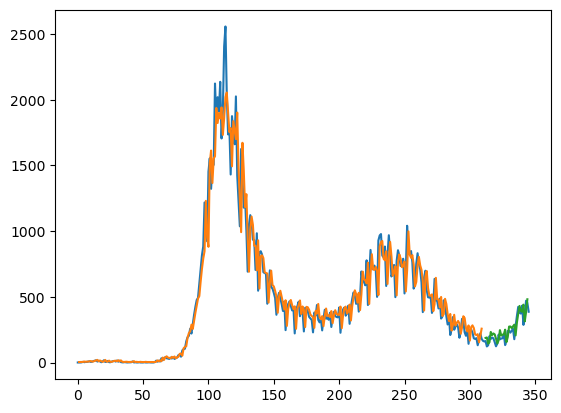

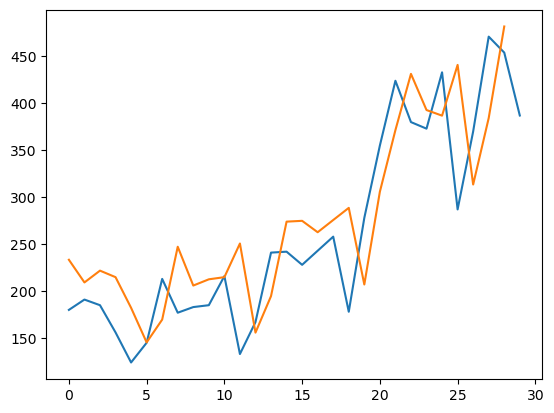

In [5]:
from tensorflow.keras.layers import Flatten,Reshape
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    SimpleRNN(64, return_sequences=True, activation='selu'),
    Dense(64, activation='selu'),
    LSTM(64, return_sequences=True, activation='selu'),
    LSTM(64, return_sequences=False, activation='selu'),
    Dense(1, activation='tanh')
])

model.output_shape
#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="keelung_rnn+lstm_1000_3.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=1000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('keelung_rnn+lstm_1000_3.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict=trainPredict.reshape(-1, 1)
testPredict=testPredict.reshape(-1, 1)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('keelung_rnn+lstm_1000_plot_3.png') 
plt.show()

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("keelung_rnn+lstm_1000_predict&real_3.png")
plt.show()

### Model4

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 1, 64)             4224      
                                                                 
 dense_4 (Dense)             (None, 1, 4)              260       
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 1, 64)             4416      
                                                                 
 dense_5 (Dense)             (None, 1, 1)              65        
                                                                 
 lstm_4 (LSTM)               (None, 1, 64)             16896     
                                                                 
 dense_6 (Dense)             (None, 1, 4)              260       
                                                                 
 lstm_5 (LSTM)               (None, 1, 64)            

Epoch 51/1000
309/309 [==============================] - 2s 5ms/step - loss: 0.0374 - mse: 0.0374 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 52/1000
309/309 [==============================] - 2s 5ms/step - loss: 0.0374 - mse: 0.0374 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 53/1000
309/309 [==============================] - 2s 5ms/step - loss: 0.0372 - mse: 0.0372 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 54/1000
309/309 [==============================] - 1s 5ms/step - loss: 0.0369 - mse: 0.0369 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 55/1000
309/309 [==============================] - 2s 5ms/step - loss: 0.0369 - mse: 0.0369 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 56/1000
309/309 [==============================] - 2s 6ms/step - loss: 0.0367 - mse: 0.0367 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 57/1000
309/309 [==============================] - 2s 6ms/step - loss: 0.0369 - mse: 0.0369 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 58/1000
309/309 [==============================] 

Epoch 110/1000
309/309 [==============================] - 2s 6ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 4.6134e-04 - val_mse: 4.6134e-04
Epoch 111/1000
309/309 [==============================] - 2s 5ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 8.8685e-04 - val_mse: 8.8685e-04
Epoch 112/1000
309/309 [==============================] - 2s 5ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 4.9041e-04 - val_mse: 4.9041e-04
Epoch 113/1000
309/309 [==============================] - 2s 5ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 4.9265e-04 - val_mse: 4.9265e-04
Epoch 114/1000
309/309 [==============================] - 2s 5ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 8.1619e-04 - val_mse: 8.1619e-04
Epoch 115/1000
309/309 [==============================] - 2s 5ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 5.5441e-04 - val_mse: 5.5441e-04
Epoch 116/1000
309/309 [==============================] - 2s 5ms/step - loss: 0.0126 - mse: 0.0126 - val_loss: 4.5813e-04 - val_mse: 4.5

309/309 [==============================] - 2s 5ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 4.7514e-04 - val_mse: 4.7514e-04
Epoch 168/1000
309/309 [==============================] - 2s 5ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 169/1000
309/309 [==============================] - 2s 5ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 4.9176e-04 - val_mse: 4.9176e-04
Epoch 170/1000
309/309 [==============================] - 2s 5ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 171/1000
309/309 [==============================] - 2s 5ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 4.9420e-04 - val_mse: 4.9420e-04
Epoch 172/1000
309/309 [==============================] - 2s 5ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 6.2753e-04 - val_mse: 6.2753e-04
Epoch 173/1000
309/309 [==============================] - 1s 5ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 4.8560e-04 - val_mse: 4.8560e-04
Epoch 174/1000
309/309 

309/309 [==============================] - 2s 5ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 5.7351e-04 - val_mse: 5.7351e-04
Epoch 225/1000
309/309 [==============================] - 1s 5ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 4.9171e-04 - val_mse: 4.9171e-04
Epoch 226/1000
309/309 [==============================] - 2s 5ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 5.7339e-04 - val_mse: 5.7339e-04
Epoch 227/1000
309/309 [==============================] - 2s 5ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 4.6367e-04 - val_mse: 4.6367e-04
Epoch 228/1000
309/309 [==============================] - 2s 5ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 5.8438e-04 - val_mse: 5.8438e-04
Epoch 229/1000
309/309 [==============================] - 3s 11ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 4.5156e-04 - val_mse: 4.5156e-04
Epoch 230/1000
309/309 [==============================] - 1s 4ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 9.6146e-04 - val_mse: 9.6146e-04
Epoch 

309/309 [==============================] - 1s 5ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 9.8856e-04 - val_mse: 9.8856e-04
Epoch 339/1000
309/309 [==============================] - 1s 5ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 5.3189e-04 - val_mse: 5.3189e-04
Epoch 340/1000
309/309 [==============================] - 2s 5ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 5.2707e-04 - val_mse: 5.2707e-04
Epoch 341/1000
309/309 [==============================] - 2s 5ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 5.7286e-04 - val_mse: 5.7286e-04
Epoch 342/1000
309/309 [==============================] - 2s 5ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 4.5406e-04 - val_mse: 4.5406e-04
Epoch 343/1000
309/309 [==============================] - 2s 5ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 6.5820e-04 - val_mse: 6.5820e-04
Epoch 344/1000
309/309 [==============================] - 2s 5ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 7.5125e-04 - val_mse: 7.5125e-04
Epoch 3

309/309 [==============================] - 2s 5ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 5.8798e-04 - val_mse: 5.8798e-04
Epoch 905/1000
309/309 [==============================] - 1s 5ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 4.5422e-04 - val_mse: 4.5422e-04
Epoch 906/1000
309/309 [==============================] - 1s 5ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 4.5539e-04 - val_mse: 4.5539e-04
Epoch 907/1000
309/309 [==============================] - 1s 5ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 908/1000
309/309 [==============================] - 2s 5ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 8.2765e-04 - val_mse: 8.2765e-04
Epoch 909/1000
309/309 [==============================] - 2s 5ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 6.8619e-04 - val_mse: 6.8619e-04
Epoch 910/1000
309/309 [==============================] - 1s 5ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 4.7973e-04 - val_mse: 4.7973e-04
Epoch 911/1000


309/309 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 4.8261e-04 - val_mse: 4.8261e-04
Epoch 962/1000
309/309 [==============================] - 2s 5ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 4.6618e-04 - val_mse: 4.6618e-04
Epoch 963/1000
309/309 [==============================] - 2s 5ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 4.9466e-04 - val_mse: 4.9466e-04
Epoch 964/1000
309/309 [==============================] - 2s 5ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 7.1557e-04 - val_mse: 7.1557e-04
Epoch 965/1000
309/309 [==============================] - 2s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 4.6816e-04 - val_mse: 4.6816e-04
Epoch 966/1000
309/309 [==============================] - 2s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 4.6430e-04 - val_mse: 4.6430e-04
Epoch 967/1000
309/309 [==============================] - 4s 14ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 4.6602e-04 - val_mse: 4.6602e-04
Epoch 

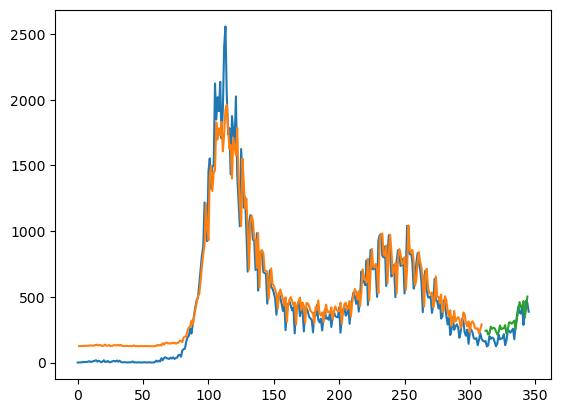

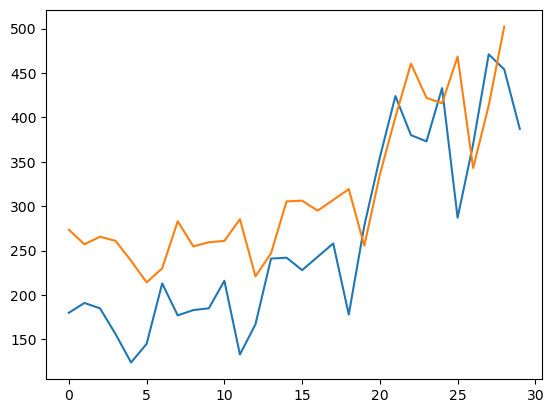

In [6]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    Dense(4, activation='elu'),
    SimpleRNN(64,return_sequences=True, activation='tanh'),
    Dense(1, activation='tanh'),
    LSTM(64,dropout=0.1,return_sequences=True, activation='elu'),
    Dense(4, activation='elu'),
    LSTM(64,dropout=0.1,return_sequences=True, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="keelung_rnn+lstm_1000_4.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=1000, batch_size=1, verbose=1,callbacks=[model_checkpoint_callback])
model.save('keelung_rnn+lstm_1000_4.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict=trainPredict.reshape(-1, 1)
testPredict=testPredict.reshape(-1, 1)
# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('keelung_rnn+lstm_1000_plot_4.png') 
plt.show()

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("keelung_rnn+lstm_1000_predict&real_4.png")
plt.show()